In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
pip install PyDrive

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
file_list[0]

GoogleDriveFile({'kind': 'drive#file', 'userPermission': {'id': 'me', 'type': 'user', 'role': 'owner', 'kind': 'drive#permission', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1ZCk9dsUQ9JuxtiCr0jCSsEYzPZ2SgmKW/permissions/me', 'etag': '"m_pA8DVcTbe9lIARUmhq3hL2rlk"', 'pendingOwner': False}, 'selfLink': 'https://www.googleapis.com/drive/v2/files/1ZCk9dsUQ9JuxtiCr0jCSsEYzPZ2SgmKW', 'ownerNames': ['NIRMAL SELVA'], 'lastModifyingUserName': 'NIRMAL SELVA', 'editable': True, 'writersCanShare': True, 'mimeType': 'application/vnd.google-apps.folder', 'parents': [{'selfLink': 'https://www.googleapis.com/drive/v2/files/1ZCk9dsUQ9JuxtiCr0jCSsEYzPZ2SgmKW/parents/0AP4F4TEK7yUTUk9PVA', 'id': '0AP4F4TEK7yUTUk9PVA', 'isRoot': True, 'kind': 'drive#parentReference', 'parentLink': 'https://www.googleapis.com/drive/v2/files/0AP4F4TEK7yUTUk9PVA'}], 'appDataContents': False, 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google-apps.folder+shared', 'shared': Tr

In [ ]:
download = drive.CreateFile({'id':'1ot_PmPOFYHwdxd-brePGhA1zIxhfvvPw'})
print("done")

done


In [ ]:
download.GetContentFile('tray.zip')

!unzip tray.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp tray.zip drive/MyDrive/

In [ ]:
!du -h drive/MyDrive/tray.zip

2.8G	drive/MyDrive/tray.zip


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm


In [ ]:
train = pd.read_csv('/content/tray/traydetect.csv') 

In [ ]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/tray'+train['images'][i], target_size=(224,224,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

In [ ]:
print(X.shape)

(4393, 224, 224, 3)


In [ ]:
y=train['id'].values
y=to_categorical(y)
print(y)
print(y.shape)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
(4393, 2)


In [ ]:
print(X.shape)
print(y.shape)

(4393, 224, 224, 3)
(4393, 2)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(type(X_test))


<class 'numpy.ndarray'>


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np
np.random.seed(1000)
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
#**special layer
#model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(2,2), padding='valid'))
#model.add(Activation('relu'))
# Pooling
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
#model.add(BatchNormalization())


# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(2048, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(1024))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(512))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
______________________________________

In [ ]:
from keras import backend as K

def mcor(y_true, y_pred):
     #matthews_correlation
     y_pred_pos = K.round(K.clip(y_pred, 0, 1))
     y_pred_neg = 1 - y_pred_pos
 
 
     y_pos = K.round(K.clip(y_true, 0, 1))
     y_neg = 1 - y_pos
 
 
     tp = K.sum(y_pos * y_pred_pos)
     tn = K.sum(y_neg * y_pred_neg)
 
 
     fp = K.sum(y_neg * y_pred_pos)
     fn = K.sum(y_pos * y_pred_neg)
 
 
     numerator = (tp * tn - fp * fn)
     denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
 
 
     return numerator / (denominator + K.epsilon())




def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

    
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy', precision ,recall,f1])

In [ ]:
history=model.fit(X_train, y_train, epochs=3,batch_size=64,verbose=1)



Epoch 1/3
3514/3514 [==============================] - 188s 54ms/step - loss: 0.1814 - accuracy: 0.9431
Epoch 2/3
3514/3514 [==============================] - 188s 53ms/step - loss: 0.1419 - accuracy: 0.9565
Epoch 3/3
3514/3514 [==============================] - 187s 53ms/step - loss: 0.1185 - accuracy: 0.9599


Text(0.5, 1.0, 'Validation loss')

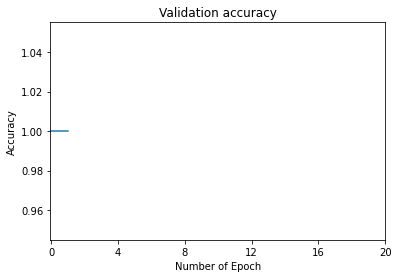

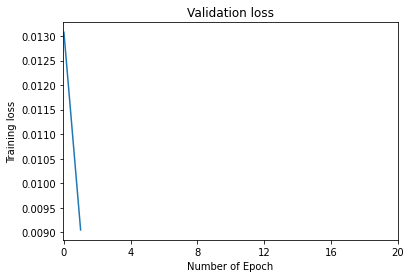

In [ ]:
acc      = history.history[     'accuracy' ]
#val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
#val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
#plt.plot  ( epochs, val_acc )
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.title ('Validation accuracy')
plt.xticks([0, 4, 8, 12, 16, 20])
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.xlabel('Number of Epoch')
plt.ylabel('Training loss')
#plt.plot  ( epochs, val_loss )
plt.xticks([0, 4, 8, 12, 16, 20])
plt.title ('Validation loss'   )

In [ ]:
model.save("tray.h5")

Non-Empty


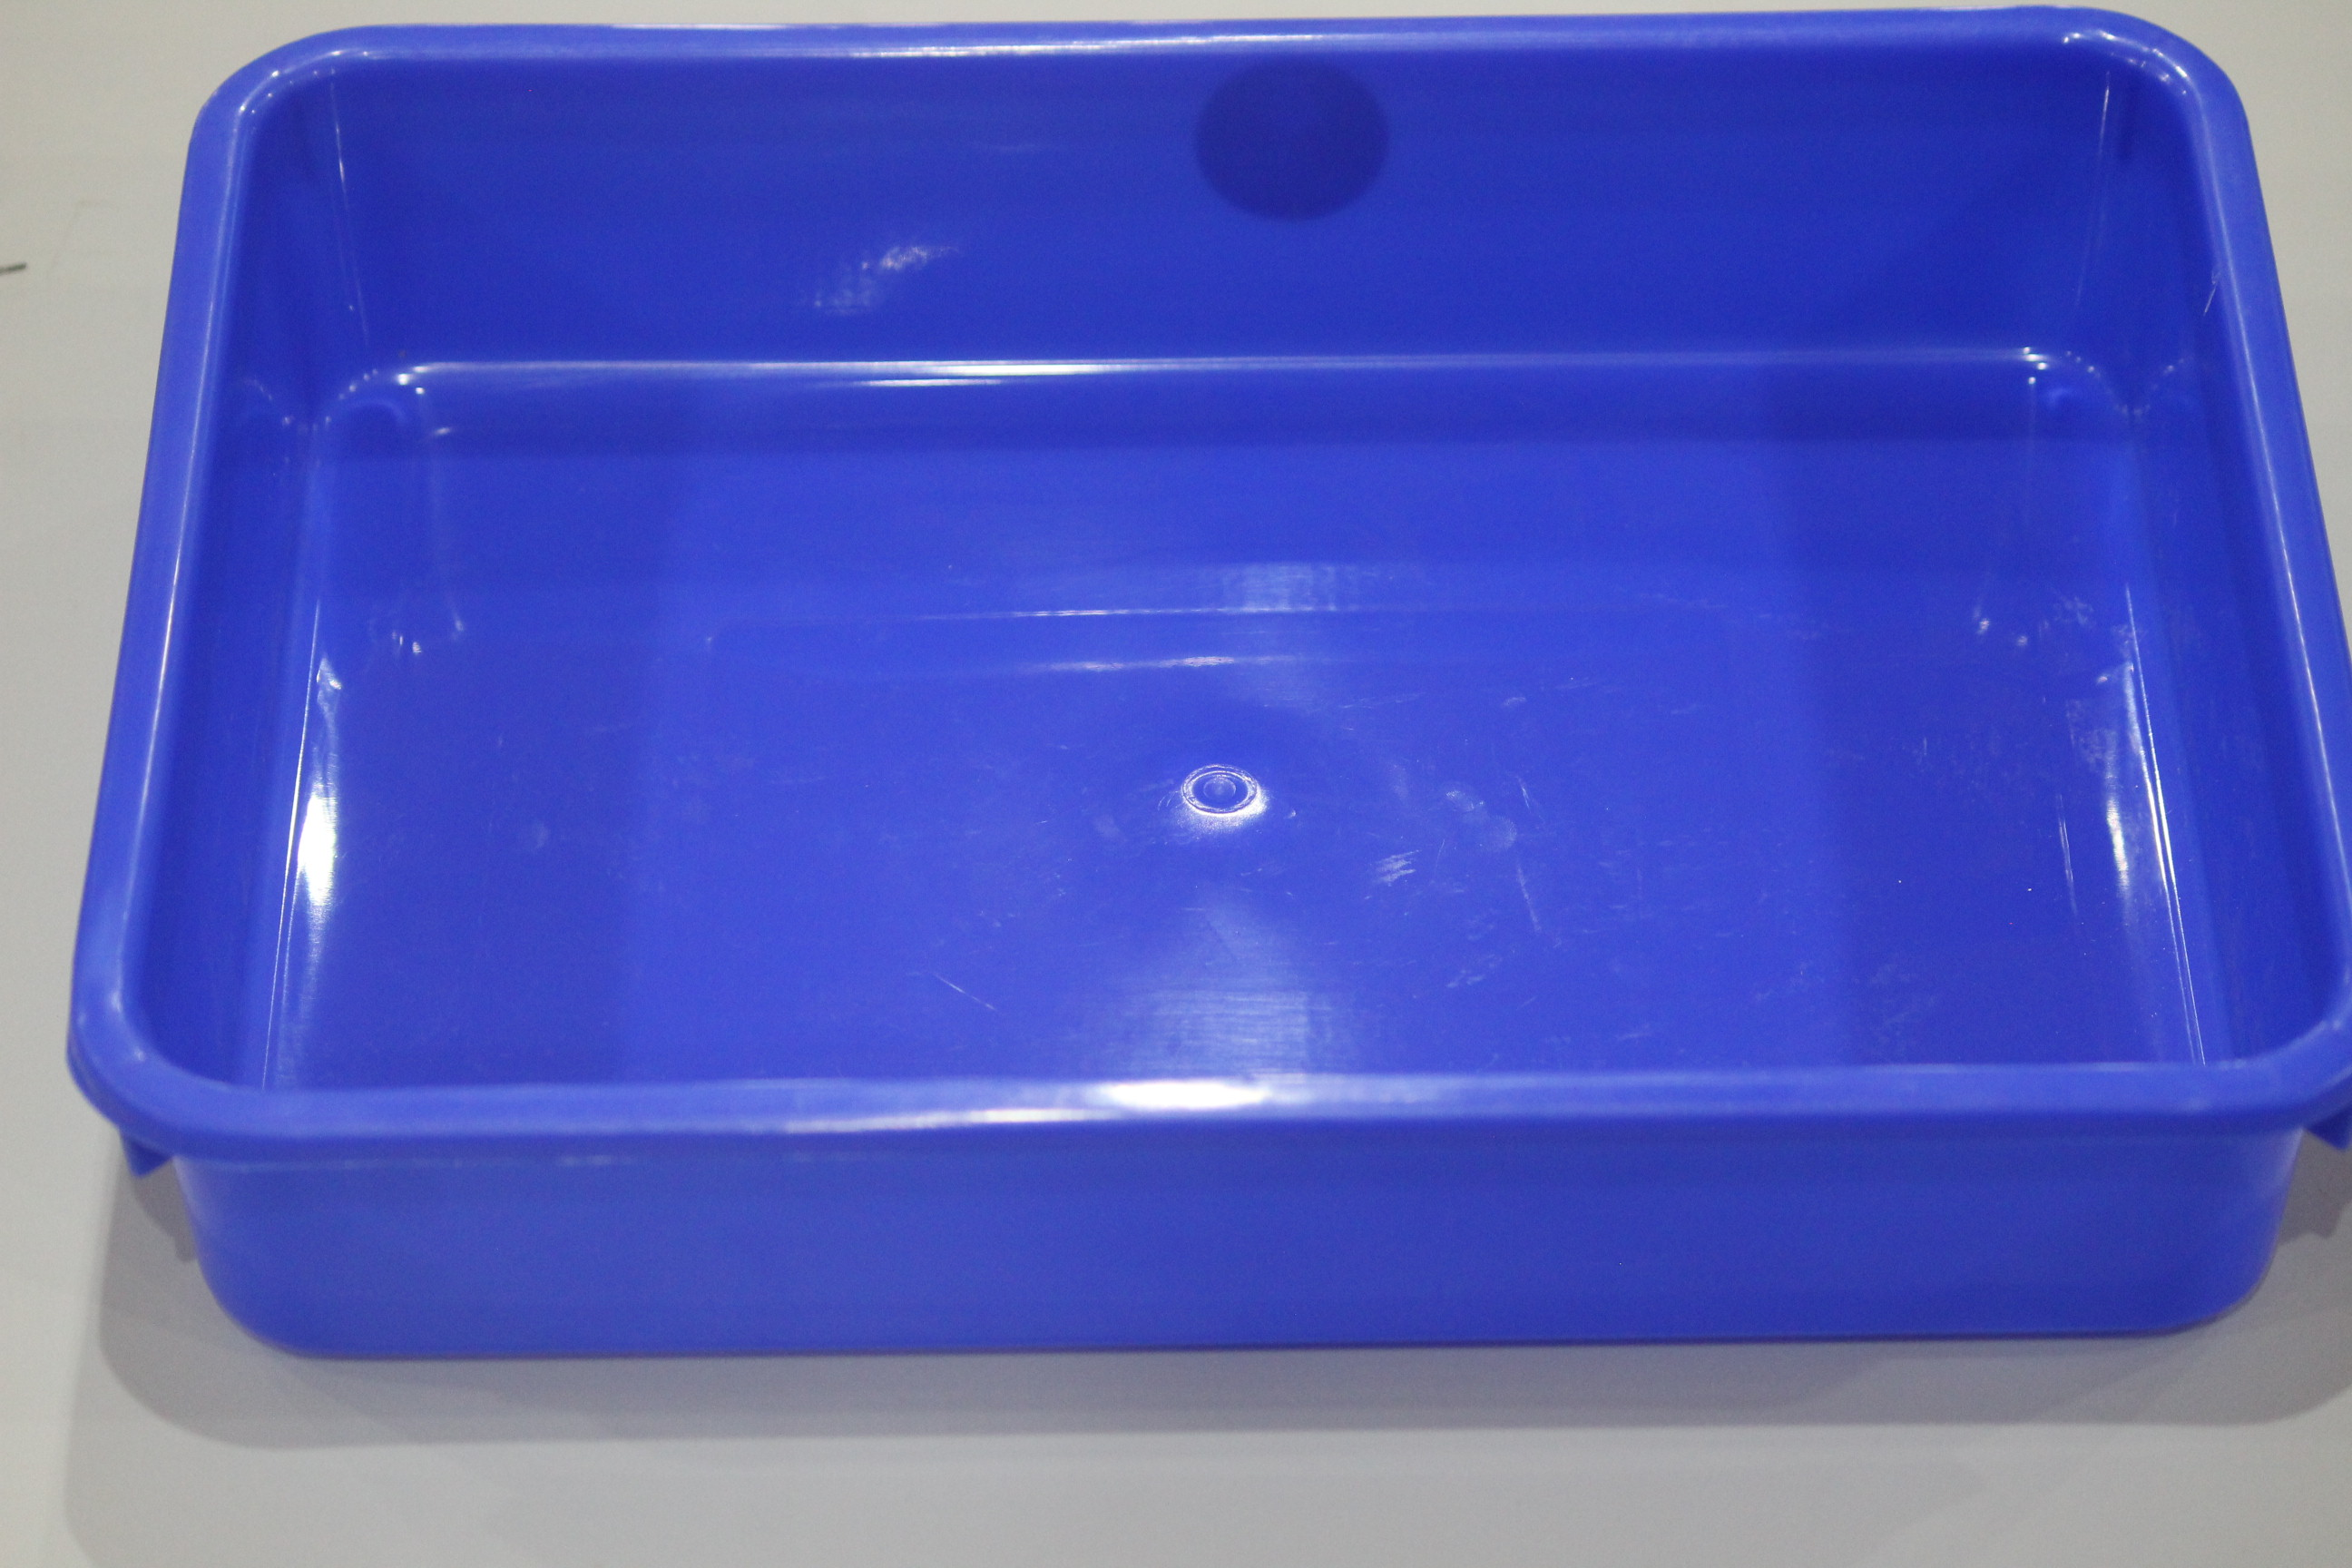

In [ ]:
import cv2
test_image = []
im = cv2.imread('/content/tray/emptytray/IMG_0358.JPG')
img = image.load_img('/content/tray/emptytray/IMG_0358.JPG', target_size=(224,224,3), grayscale=False)
img = image.img_to_array(img)
img = img/255
test_image.append(img)
X_test = np.array(test_image)
test_image=[]
prediction = model.predict_classes(X_test)
k=prediction
prediction=to_categorical(prediction)
j=0

m=['Non-Empty','Empty']
for i in X_test:
   if k[j]==0:
      print(m[0])
   elif k[j]==1:
      print(m[1])

   
from google.colab.patches import cv2_imshow
dim=(250,250)

cv2_imshow(im)


In [ ]:
import cv2
prediction = model.predict_classes(X_test)
k=prediction
print(prediction)
prediction=to_categorical(prediction)
j=0
m=['Empty','Non-Empty']
for i in X_test:
   if k[j]==0:
      print(m[0])
   elif k[j]==1:
      print(m[1])
 

   from google.colab.patches import cv2_imshow
   i=i*255
   i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
   cv2_imshow(i)
   print("\n")
   j=j+1


In [ ]:
from keras.models import load_model
score=model.evaluate(X_test,y_test)
print(score)

879/879 [==============================] - 12s 13ms/step
[0.32601142231591124, 0.9032992124557495]


In [ ]:
pred=model.predict(X,batch_size=None,verbose=0,steps=None,callbacks=None,max_queue_size=10,workers=1,use_multiprocessing=False)
pred=np.argmax(pred,axis=1)[:879]
label=np.argmax(y,axis=1)[:879]
print(pred)
print(label)

NameError: ignored

In [ ]:
from sklearn.metrics import recall_score,precision_score,f1_score,confusion_matrix
recall=recall_score(label,pred,average='macro')
print("Recall")
print(recall)
precision=precision_score(label,pred,average='macro')
print("Precision")
print(precision)
f1=f1_score(label,pred,average='macro')
print("F1-Score")
print(f1)

Recall
0.9229999999999998
Precision
0.924173384949716
F1-Score
0.9232850456210413


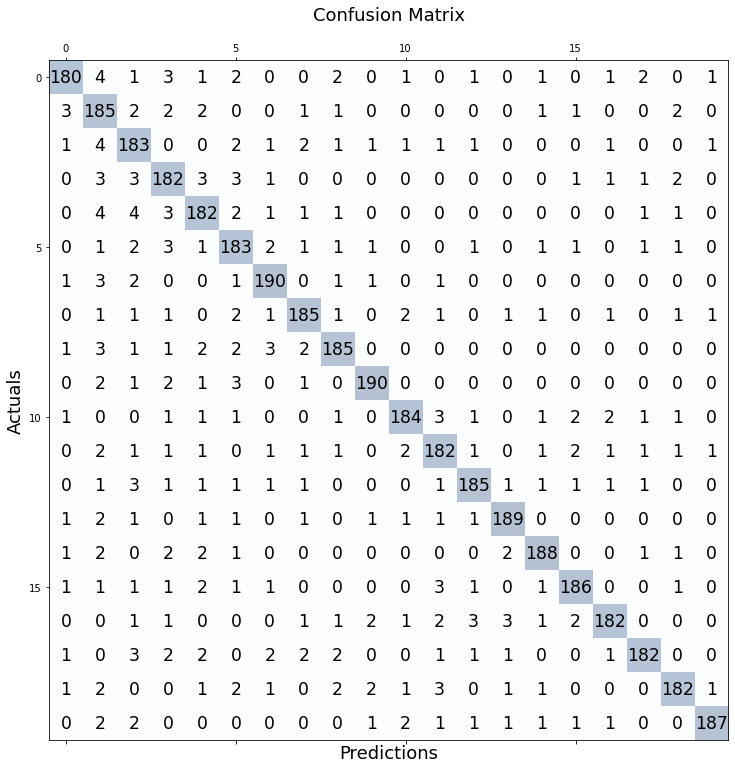

In [ ]:
import matplotlib.pyplot as plt
#Confusion Matrix
conf_matrix = confusion_matrix(y_true=label, y_pred=pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(12.5, 12.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()